In [12]:
import matplotlib.pyplot as plt
from graph import *

def draw(ax, G, colors=None, name=None, node_size=10, node_shape='o', alpha=1.0):
    pos = nx.get_node_attributes(G, 'pos')
    
    if not colors:
        colors = ['r'] * len(G.node)
    elif not isinstance(colors, list):
        colors = [colors] * len(G.node)
        
    nx.draw_networkx_edges(G, pos, alpha=0.8, ax=ax) 
    nx.draw_networkx_nodes(
        G, pos, 
        nodelist=list(G.nodes),
        node_size=node_size,
        node_shape=node_shape,
        alpha=alpha,
        node_color=colors,
        cmap=plt.cm.Reds_r,
        ax=ax
    )

def draw_node(ax, x, y):
    ax.scatter(x, y, s=50, marker='s')

In [13]:
# define following parameters to visualize the map
MAP_DIR = "/Users/username/Projects/MontiSim/server/restful/src/test/resources/aachen6"
MAP_NAME_WITHOUT_SUFIX = 'Aachen'
NUM_SECTOR = 6

graph = Graph(MAP_DIR, MAP_NAME_WITHOUT_SUFIX, NUM_SECTOR)

/Users/ham/.pyenv/versions/3.6.8/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


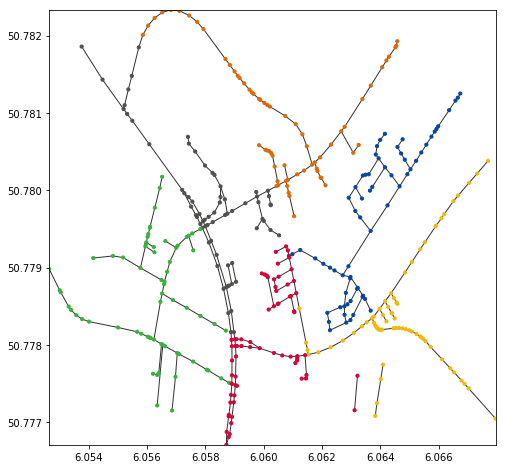

In [14]:
# %matplotlib notebook
G = graph.get_complete_graph()

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)

min_lon, min_lat, max_lon, max_lat = get_bound(G)
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

colors = [
    '#F0BA0B', '#D70038', '#37B23B', '#04479F', '#DE6905', '#50514F', '#F25F5C', '#FFE066',
    '#247BA0', '#70C1B3'
]


# draw(ax, graph.get_overlay(), color='#70C1B3', node_size=40, node_shape='^', alpha=0.8)
node_colors = []
for node in G.nodes:
    color_idx = graph.osm_id_to_sector_idx_map[node] % len(colors)
    node_colors.append(colors[color_idx])

# we can draw the whole map with:
# different colors represent different sectors
draw(ax, G, colors=node_colors)

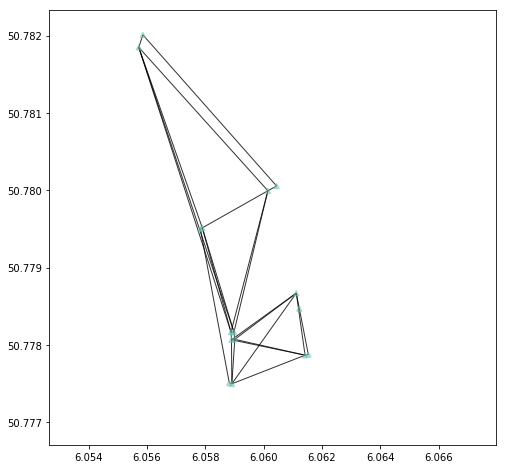

In [15]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

# we can draw the overlay map with:
draw(ax, graph.get_overlay(), colors='#70C1B3', node_size=30, node_shape='^', alpha=0.5)

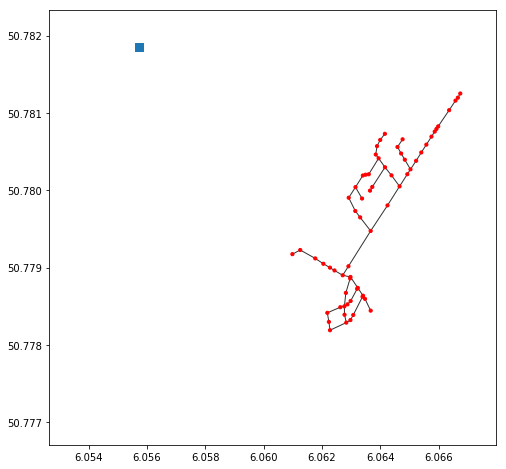

In [16]:
# it is also possible to draw a specific sector
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

# for example we can draw sector 3 with:
draw(ax, graph.get_sector(3))

# or to draw a specific osm node(will be a blue square in `ax`):
draw_node(ax, *graph.get_node_position(60009520))